<a href="https://colab.research.google.com/github/oussemachihi70-blip/linear-regression-for-prediction-student-score/blob/main/project_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# my ML **project**

## load data

In [3]:
import pandas as pd
df=pd.read_csv('/content/orca_share_media1759417914548_7379533596660903554 (3).csv')
df.describe()["Final_Score"]
df

,Study_Hours,Attendance,Practice_Tests,Final_Score,Pass_Fail
0,3.745401,59.256646,1,53.580408,1
1,9.507143,77.095047,2,84.990141,1
2,7.319939,93.647292,3,100.000000,1
3,5.986585,86.611244,1,76.978847,1
4,1.560186,90.328057,0,46.875418,0
...,...,...,...,...,...
495,3.533522,83.410640,1,50.488596,1
496,5.836561,80.974517,0,65.307977,1
497,0.777346,73.174702,1,48.149568,0
498,9.743948,68.989289,4,100.000000,1


## data preparation

### data **separation**

In [4]:
y=df['Final_Score']
y

,Final_Score
0,53.580408
1,84.990141
2,100.000000
3,76.978847
4,46.875418
...,...
495,50.488596
496,65.307977
497,48.149568
498,100.000000


In [5]:
x=df.drop(['Final_Score','Pass_Fail'],axis=1)
x

,Study_Hours,Attendance,Practice_Tests
0,3.745401,59.256646,1
1,9.507143,77.095047,2
2,7.319939,93.647292,3
3,5.986585,86.611244,1
4,1.560186,90.328057,0
...,...,...,...
495,3.533522,83.410640,1
496,5.836561,80.974517,0
497,0.777346,73.174702,1
498,9.743948,68.989289,4


### data splitting

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## model building

### linear regression

training the model

In [7]:
from sklearn.linear_model import LinearRegression ,LogisticRegression
Lr=LinearRegression()
Lr.fit(x_train,y_train)
y_train_pred=Lr.predict(x_train)
y_test_pred=Lr.predict(x_test)

evaluate model preformance

In [8]:
from sklearn.metrics import r2_score,mean_squared_error
lr_train_r2=r2_score(y_train,y_train_pred)
lr_test_r2=r2_score(y_test,y_test_pred)
lr_train_mse=mean_squared_error(y_train,y_train_pred)
lr_test_mse=mean_squared_error(y_test,y_test_pred)
print(lr_train_mse)
print(lr_test_mse)

29.290091873452795
33.75821994148369


## data visualisation

Text(0.5, 0, 'actual score')

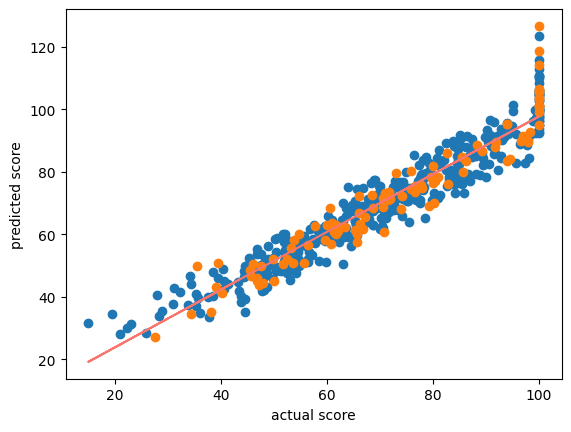

In [9]:
import matplotlib.pyplot as plt
import numpy as np
z=np.polyfit(y_train,y_train_pred,1)
p=np.poly1d(z)
plt.plot(y_train,p(y_train),'#F8766D')
plt.scatter(x=y_train,y=y_train_pred)
plt.scatter(x=y_test,y=y_test_pred)
plt.plot()
plt.ylabel('predicted score')
plt.xlabel('actual score')

In [10]:
import gradio as gr
def score(Study_Hours, Attendance, Practice_Tests):
    predicted_score = Lr.predict([[Study_Hours, Attendance, Practice_Tests]])[0]
    result = "Pass" if predicted_score >= 50 else "Fail"
    return round(predicted_score, 2), result

demo = gr.Interface(
    fn=score,
    inputs=[
        gr.Number(label="Study Hours"),
        gr.Number(label="Attendance (%)"),
        gr.Number(label="Practice Tests Taken")
    ],
    outputs=[
        gr.Number(label="Predicted Final Score"),
        gr.Text(label="Result (Pass/Fail)")
    ],
    title="Student Score Predictor",
    description="Predicts the final exam score and pass/fail result based on study hours, attendance, and number of practice tests."
)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://396669732c7edd51db.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
